<a href="https://colab.research.google.com/github/camilotayac/computational_chemistry-TC/blob/master/Colab/pore_analysis_HOLE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️ Pore analysis with **HOLE2** ♾️ Análisis de poro con **HOLE2**

🐉 **@Tyac**

🏦 **Universidad de Caldas**

🌇 **Manizales - Colombia**

In [ ]:
# @title ## 🟢  Installation of programs and import of required libraries ♾️ Instalación de programas e importación de librerías necesarias
%cd ~
!wget https://www.holeprogram.org/downloads/2.2.005/hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz
!tar xf hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz
!pip install nglview==3.0.8
!pip install "ipywidgets>=7,<8"
!pip install --upgrade MDAnalysis
!pip install --upgrade MDAnalysis[analysis]
!pip install --upgrade MDAnalysisTests
!pip install matplotlib
#Plotly
!pip install plotly
!pip install -U kaleido
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
#Import


import numpy as np
import plotly.graph_objects as go
import kaleido
from google.colab import output
output.enable_custom_widget_manager()
import nglview
import ipywidgets
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_HOLE
from MDAnalysis.analysis import hole2
from MDAnalysis.coordinates.GRO import GROWriter
from MDAnalysis.transformations import center_in_box
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
%matplotlib inline

import warnings
# suppress some MDAnalysis warnings when writing PDB files
warnings.filterwarnings('ignore')

/root
--2024-05-27 00:49:33--  https://www.holeprogram.org/downloads/2.2.005/hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz
Resolving www.holeprogram.org (www.holeprogram.org)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to www.holeprogram.org (www.holeprogram.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8847026 (8.4M) [application/gzip]
Saving to: ‘hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz.1’

hole2-ApacheLicense 100%[===================>]   8.44M  --.-KB/s    in 0.1s    

2024-05-27 00:49:33 (73.7 MB/s) - ‘hole2-ApacheLicense-2.2.005-Linux-x86_64.tar.gz.1’ saved [8847026/8847026]

--2024-05-27 00:50:39--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/git

In [ ]:
# @title ## 📁 Files for analysis ♾️ Archivos para el análisis
# @markdown ### **🇺🇸** - Select whether you will work with tutorial files or with your own files
# @markdown ### **🇪🇸** - Seleccione si va a trabajar con archivos del tutorial o con archivos propios
files = 'Tutorial files - Archivos del tutorial'# @param ['Tutorial files - Archivos del tutorial', 'Own files - Archivos propios']
# @markdown #### 🔴 **🇺🇸 - Note:** add the address of your folder, example: ***folder_a*** or ***folder_a/folder_b***
# @markdown #### 🔴 **🇪🇸 - Nota:** agregue la dirección de su carpeta, ejemplo: ***carpeta_a*** o ***carpeta_a/carpeta_b***
drive_folder_path = "MD" #@param {type:"string"}

if files == 'Tutorial files - Archivos del tutorial':
  %cd /content
  !git clone https://github.com/camilotayac/computational_chemistry-TC.git
  %cd computational_chemistry-TC/Examples
elif files == 'Own files - Archivos propios':
  from google.colab import drive
  drive.mount('/content/drive')
  carpeta = "/content/drive/MyDrive/" + drive_folder_path
  %cd {carpeta}

/content
Cloning into 'computational_chemistry-TC'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 108 (delta 30), reused 37 (delta 2), pack-reused 0
Receiving objects: 100% (108/108), 8.07 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/computational_chemistry-TC/Examples


[]

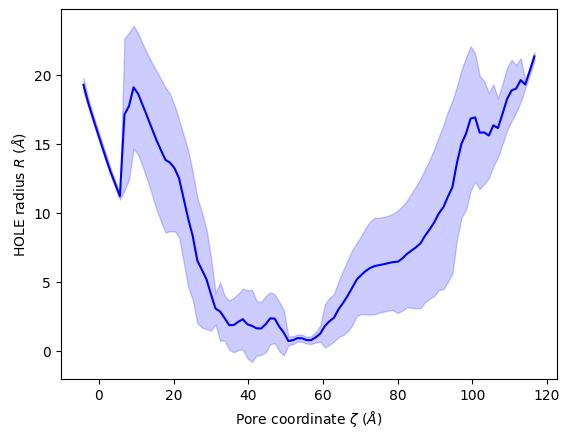

In [ ]:
# @title ## 🟢 Variables for analysis ♾️ Variables para análisis

# @markdown ---

# @markdown ### **🇺🇸** - Analysis with or without track record
# @markdown ### **🇪🇸** - Análisis con o sin trayectoria

selection_trajectory = "with trajectory - con trayectoria"# @param ["with trajectory - con trayectoria", "without trajectory - sin trayectoria"]
# @markdown ---

# @markdown ### 🟣 without trajectory ♾️ sin trayectoria
# @markdown ### **🇺🇸** - Filename with extension **.pdb** o **.gro**
# @markdown ### **🇪🇸** - Nombre del archivo con extensión **.pdb** o **.gro**

file_name = "6uqf.pdb 1bl8.pdb" # @param {type:"string"}
file_name = file_name.split(" ")

# @markdown ---

# @markdown ### 🟣 with trajectory ♾️ con trayectoria


# @markdown ### **🇺🇸** - Filename with extension **.pdb** o **.gro**
# @markdown ### **🇪🇸** - Nombre del archivo con extensión **.pdb** o **.gro**

file_name_trajectory = "membrane_protein.gro" # @param {type:"string"}
file_name_trajectory = file_name_trajectory.split(" ")

# @markdown ### **🇺🇸** - Extension trajectory **.xtc** o **.trr**
# @markdown ### **🇪🇸** - Trayectoria con la extensión **.xtc**, **.dcd** o **.trr**

name_trajectory = "membrane_protein.xtc" # @param {type:"string"}
name_trajectory = name_trajectory.split(" ")

# @markdown ---

# @markdown #### 🔴 **🇺🇸 - Note:** for multiple files, separate them with ***spaces***, if an error occurs it may be due to a ***double space***
# @markdown #### 🔴 **🇪🇸 - Nota:** para varios archivos sepárelos con ***espacios***, si surge un error puede ser por un ***doble espacio***

# @markdown ---

# @markdown ### **🇺🇸** - Seed for random number generation
# @markdown ### **🇪🇸** - Semilla para generar números aleatorios

seed = 197382465 # @param {type:"integer"}

# @markdown ---

# @markdown ### **🇺🇸** - Graph modification options: color, typography and grid
# @markdown ### **🇪🇸** - Opciones de modificación de gráfica: color, tipografía y rejilla

colors_plotly = "blue" # @param ["black","orange","purple","red","pink", "blue", "green", "yellow", "lavender", "coral", "lightskyblue", "lightseagreen", "lightsteelblue"]
font_families = "Arial" # @param["Arial", "Times New Roman", "Verdana", "Georgia", "Courier New", "Andale Mono", "Comic Sans MS"]
grid = True # @param {type:"boolean"}

# @markdown ---



if selection_trajectory == "without trajectory - sin trayectoria":
  for files in file_name:
    name, extension = files.split(".")
    profiles = hole2.hole(files,
                          outfile=f'{name}.out',
                          sphpdb_file=f'{name}.sph',
                          vdwradii_file=None,
                          random_seed=seed,
                          executable='/root/hole2/exe/hole',
                          )
    hole2.create_vmd_surface(filename=f'{name}.vmd',
                         sphpdb=f'{name}.sph',
                         sph_process='/root/hole2/exe/sph_process',
                         )
    rxn_coords = profiles[0].rxn_coord
    pore_length = rxn_coords[-1] - rxn_coords[0]
    print(f'The pore {name} is {pore_length} angstroms long')
    rxn_coords = profiles[0].rxn_coord
    pore_length = profiles[0].radius
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=rxn_coords, y=pore_length, mode='lines', line=dict(color=colors_plotly)))
    fig.update_layout(
        xaxis_title="Pore coordinate ζ (Å)",
        yaxis_title="Mean HOLE radius R (Å)",
        font_family=font_families)
    if grid == True:
      pass
    elif grid == False:
      fig.update_layout(plot_bgcolor='white',
        xaxis=dict(
        linecolor='black',
        ticks='outside',
        tickcolor='black',
        tickwidth=1 ),
        yaxis=dict(
        linecolor='black',
        ticks='outside',
        tickcolor='black',
        tickwidth=1
        ))
    fig.show()
    fig.write_image(f"{name}_PM_.png",scale=10,  format="png")
elif selection_trajectory == "with trajectory - con trayectoria":
  counter = 0
  for files in file_name_trajectory:
    name, extension = files.split(".")
    u = mda.Universe(files,name_trajectory[counter])
    ha = hole2.HoleAnalysis(u, select='protein',
                        cpoint='center_of_geometry',
                        executable='/root/hole2/exe/hole',
                        )
    ha.run(random_seed=seed)
    # Plotly 1
    radii, edges = ha.bin_radii(bins=100, range=None)
    means, edges = ha.histogram_radii(bins=100, range=None, aggregator=np.mean)
    midpoints = 0.5 * (edges[1:] + edges[:-1])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=midpoints, y=means, mode='lines', line=dict(color=colors_plotly)))
    fig.update_layout(
        xaxis_title="Pore coordinate ζ (Å)",
        yaxis_title="Mean HOLE radius R (Å)",
        font_family=font_families)
    if grid == True:
      pass
    elif grid == False:
      fig.update_layout(plot_bgcolor='white',
        xaxis=dict(
        linecolor='black',
        ticks='outside',
        tickcolor='black',
        tickwidth=1 ),
        yaxis=dict(
        linecolor='black',
        ticks='outside',
        tickcolor='black',
        tickwidth=1
        ))
    fig.show()
    fig.write_image(f"{name}_PM.png",scale=10,  format="png")
    # Plotly 2
    min_radii = ha.min_radius()
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=min_radii[:, 0], y=min_radii[:, 1], mode='lines', line=dict(color=colors_plotly)))
    fig.update_layout(
        xaxis_title="Frame",
        yaxis_title= "Minimum HOLE radius R (Å)",
        font_family=font_families,)
    if grid == True:
      pass
    elif grid == False:
      fig.update_layout(plot_bgcolor='white',
        xaxis=dict(
        linecolor='black',
        ticks='outside',
        tickcolor='black',
        tickwidth=1 ),
        yaxis=dict(
        linecolor='black',
        ticks='outside',
        tickcolor='black',
        tickwidth=1
        ))
    fig.show()
    fig.write_image(f"{name}_PF.png",scale=10,  format="png")
    # table
    data = [(frame, min_radius) for frame, min_radius in min_radii]
    df = pd.DataFrame(data, columns=['Frame', 'Min Radius (Å)'])
    df.to_csv(f'{name}_min_radii.csv', index=False)
    fig = go.Figure(data=[go.Table(header=dict(values=list(df.columns)),
                    cells=dict(values=[df['Frame'], df['Min Radius (Å)']]))])
    fig.update_layout(font_family=font_families)
    fig.show()
    # fig 3
    ha.plot_mean_profile(bins=100,
                     n_std=1,
                     color=colors_plotly,
                     fill_alpha=0.2,
                     legend=False)
    plt.savefig(f"{name}_std.png",dpi=1000)
ha.delete_temporary_files()
ha.tmp_files

 ## 🟢 bibliography ♾️ Bibliografía
---

### **🇺🇸**
This Colab was based on the tutorial [Analysing pore dimensions with HOLE2](https://userguide.mdanalysis.org/stable/examples/analysis/polymers_and_membranes/hole2.html) from [MDAnalysis](https://userguide.mdanalysis.org/stable/index.html). Please contact MDAnalysis for quotation

---

### **🇪🇸**
Este Colab se basó en el tutorial [Analysing pore dimensions with HOLE2](https://userguide.mdanalysis.org/stable/examples/analysis/polymers_and_membranes/hole2.html) de [MDAnalysis](https://userguide.mdanalysis.org/stable/index.html). Por favor dirigirse a MDAnalysis para citar